## Market Basket Analysis

### Step 1: Importing the required libraries



In [1]:
# importing all necccessary liberies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import mlxtend
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

### Step 2: Loading and exploring the data

In [2]:
#reading the data into a DataFrame
df = pd.read_csv('Market Basket Analysis - Groceries_dataset.csv')

In [4]:
# Display the first few rows
df.head(10)

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk
5,4941,14-02-2015,rolls/buns
6,4501,08-05-2015,other vegetables
7,3803,23-12-2015,pot plants
8,2762,20-03-2015,whole milk
9,4119,12-02-2015,tropical fruit


In [5]:
df.columns

Index(['Member_number', 'Date', 'itemDescription'], dtype='object')

In [6]:
df.shape

(38765, 3)

In [7]:
#CHECKING FOR THE MISSING VALUES
df.isnull().sum()

Member_number      0
Date               0
itemDescription    0
dtype: int64

In [8]:
#CHECKING FOR THE INFORMATION OF THE DATASET
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Member_number    38765 non-null  int64 
 1   Date             38765 non-null  object
 2   itemDescription  38765 non-null  object
dtypes: int64(1), object(2)
memory usage: 908.7+ KB


### Data Preparation for Market Basket Analysis
The following step is a vital phase in the Market Basket Analysis process, we need to transform this data into a format that can easily be ingested into the Apriori algorithm. In other words, we aim to represent it into a tabular structure where ones and zeros denote the presence or absence of specific elements.



### Step 3: Converting the data into suitable format for the analysis



In [9]:
#combining the member_number and date to show us the items purchased in one receipt

df['single_transaction'] = df['Member_number'].astype(str)+'_'+df['Date'].astype(str)

df.head()




,Member_number,Date,itemDescription,single_transaction
0,1808,21-07-2015,tropical fruit,1808_21-07-2015
1,2552,05-01-2015,whole milk,2552_05-01-2015
2,2300,19-09-2015,pip fruit,2300_19-09-2015
3,1187,12-12-2015,other vegetables,1187_12-12-2015
4,3037,01-02-2015,whole milk,3037_01-02-2015


 The “single_transaction” variable combines the member number, and date, and tells us the item purchased in one receipt.



Next, the resulting table tells us how many times each item has been purchased in one transaction:

In [10]:
#converting the items into columns and transactions into rows

df2 = pd.crosstab(df['single_transaction'], df['itemDescription'])
df2.head()

itemDescription,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
single_transaction,,,,,,,,,,,,,,,,,,,,,
1000_15-03-2015,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
1000_24-06-2014,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1000_24-07-2015,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1000_25-11-2015,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1000_27-05-2015,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Apriori Algorithm and One-Hot Encoding
Apriori's algorithm transforms True/False or 1/0. Using TransactionEncoder, we convert the list to a One-Hot Encoded Boolean list. Products that customers bought or did not buy during shopping will now be represented by values 1 and 0.

In [11]:
#encoding all values to 0 and 1
def encode(item_freq):
    res = 0
    if item_freq > 0:
        res = 1
    return res
    
basket_input = df2.applymap(encode)


### Step 4: Build the Apriori Algorithm for Market Basket Analysis

In [12]:
frequent_itemsets = apriori(basket_input, min_support=0.01, use_colnames=True)

rules = association_rules(frequent_itemsets, metric="lift", min_threshold=0)

rules.head()

C:\Users\Felix\AppData\Roaming\Python\Python310\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(rolls/buns),(other vegetables),0.110005,0.122101,0.010559,0.095990,0.786154,-0.002872,0.971117,-0.234091
1,(other vegetables),(rolls/buns),0.122101,0.110005,0.010559,0.086481,0.786154,-0.002872,0.974249,-0.236553
2,(whole milk),(other vegetables),0.157923,0.122101,0.014837,0.093948,0.769430,-0.004446,0.968928,-0.262461
3,(other vegetables),(whole milk),0.122101,0.157923,0.014837,0.121511,0.769430,-0.004446,0.958551,-0.254477
4,(whole milk),(rolls/buns),0.157923,0.110005,0.013968,0.088447,0.804028,-0.003404,0.976350,-0.224474


 Next, we sort the entire dataset by support, confidence, and lift to get the most frequent item combinations.

In [24]:
#sorting the dataset
rules.sort_values(["support", "confidence","lift"],axis = 0, ascending = False ).head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
3,other vegetables,whole milk,0.122101,0.157923,0.014837,0.121511,0.769430,-0.004446,0.958551,-0.254477
2,whole milk,other vegetables,0.157923,0.122101,0.014837,0.093948,0.769430,-0.004446,0.968928,-0.262461
5,rolls/buns,whole milk,0.110005,0.157923,0.013968,0.126974,0.804028,-0.003404,0.964550,-0.214986
4,whole milk,rolls/buns,0.157923,0.110005,0.013968,0.088447,0.804028,-0.003404,0.976350,-0.224474
6,soda,whole milk,0.097106,0.157923,0.011629,0.119752,0.758296,-0.003707,0.956636,-0.260917
7,whole milk,soda,0.157923,0.097106,0.011629,0.073635,0.758296,-0.003707,0.974663,-0.274587
8,yogurt,whole milk,0.085879,0.157923,0.011161,0.129961,0.822940,-0.002401,0.967861,-0.190525
9,whole milk,yogurt,0.157923,0.085879,0.011161,0.070673,0.822940,-0.002401,0.983638,-0.203508
0,rolls/buns,other vegetables,0.110005,0.122101,0.010559,0.095990,0.786154,-0.002872,0.971117,-0.234091
1,other vegetables,rolls/buns,0.122101,0.110005,0.010559,0.086481,0.786154,-0.002872,0.974249,-0.236553


### From the market basket analysis the five most frequent item pairs are:
1. other vegetables and whole milk

2. rolls/buns and whole milk

3. soda and whole milk

4. yogurt and whole milk

5. rolls/buns and other vegetables 



### Step5: Creating a bar chart to visualizing the frequent items sales



Text(0, 0.5, 'Itemsets')

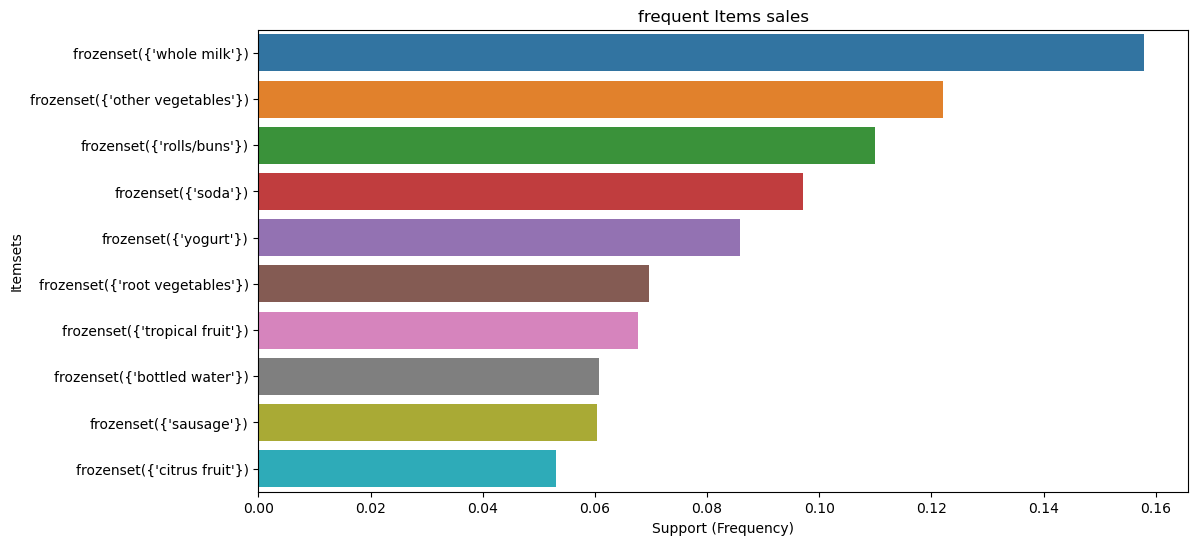

In [14]:
top_items = frequent_itemsets.nlargest(10, 'support')
plt.figure(figsize=(12, 6))
sns.barplot(x='support', y='itemsets', data=top_items)
plt.title('frequent Items sales')
plt.xlabel('Support (Frequency)')
plt.ylabel('Itemsets')

# From our visualization the five most frequently sold items are:

1. Other vegetables
2. rolls/buns
3. soda
4. yogurt
5. root vegatable
